# EDA

#### Seaborn - `pairplot`

데이터 속 모든 컬럼들의 상관관계 분석 > 히스토그램, 분포도 출력

In [1]:
# load lib
import seaborn as sns
import pandas as pd

In [2]:
train = pd.read_csv('../data/와인/train.csv')

In [3]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


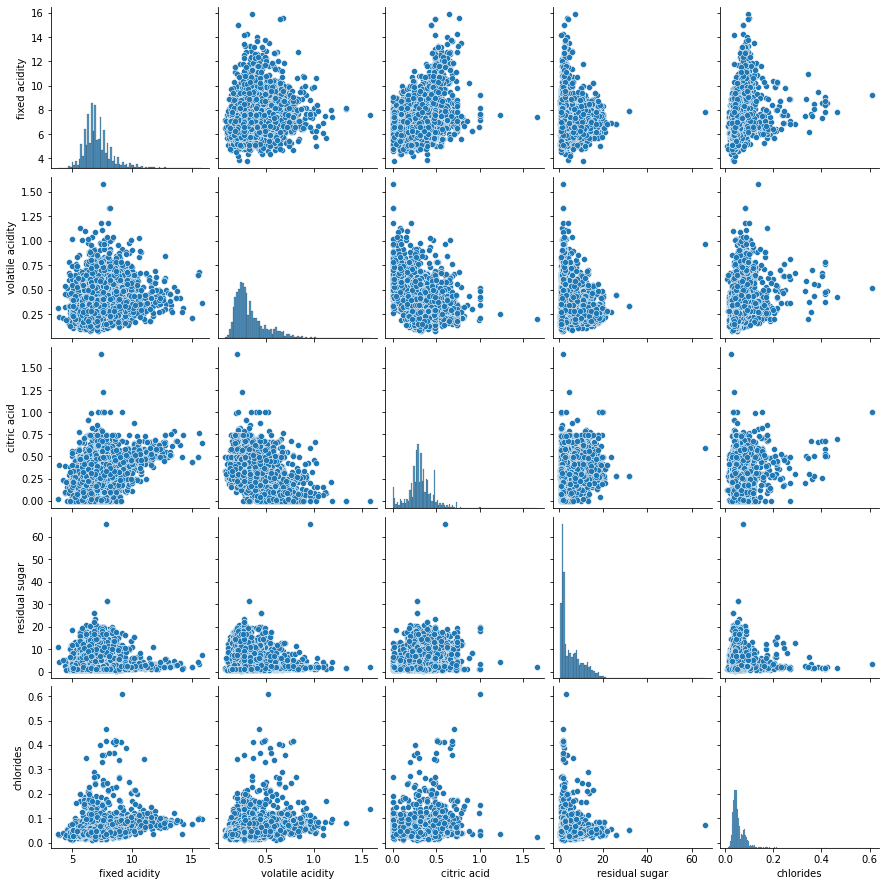

In [4]:
# fixed acidity ~ chlorides 칼럼에 해당하는 모든 데이터를 data변수에 저장
data = train.loc[:, 'fixed acidity' : 'chlorides']

# data' pairplot
sns.pairplot(data)

#### seaborn : `distplot`
데이터를 히스토그램으로 시각화하기

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

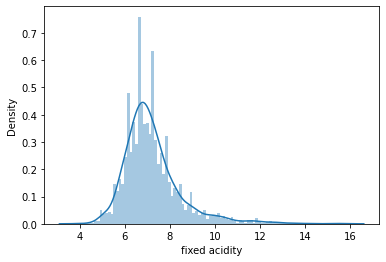

In [5]:
data = train['fixed acidity']

#data' distplot
sns.distplot(data, bins = 100)

#### seaborn - `heat map`

두 개의 카테고리형 변수에 대해 반응변수의 크기를 색상의 변화로 표현<br>
**변수별 상관관계를 파악할 때 많이 사용**

<AxesSubplot:>

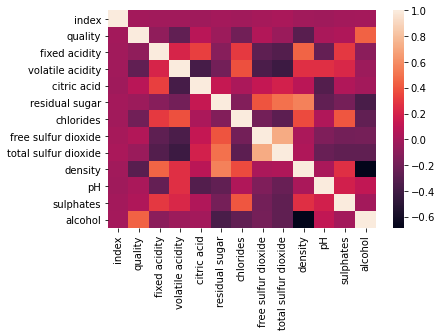

In [6]:
# 히트맵 그래프의 변수 지정(데이터의 변수들 사이 상관도 확인)
data = train.corr()
# heat map
sns.heatmap(data)

### **다중공선성(Multicollinearity)**
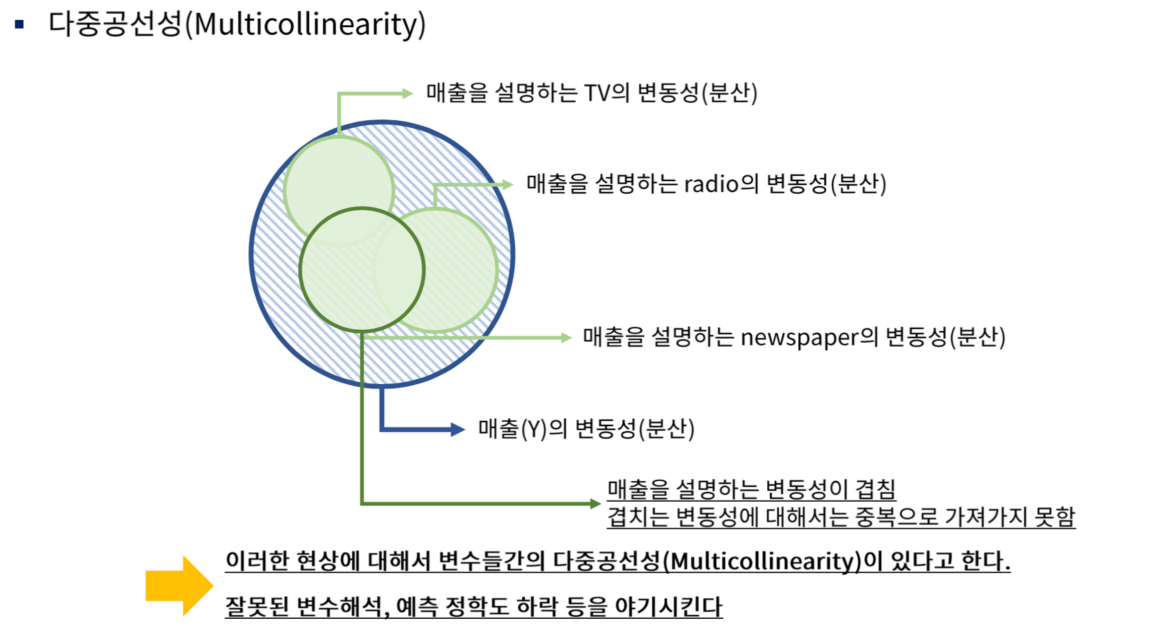
상관관계가 높은 독립변수들이 동시에 모델에 포함될 때 발생.<br>
두 변수가 완벽하게 다중공선성에 위치한다면 같은 변수를 2번 넣은 것과 마찬가지가 돼버림<br>
다중공선성은 잘못된 변수해석, 예측 정확도를 하락시켜 모델의 결과값 추론에 방해가 될 수 있음

<AxesSubplot:xlabel='residual sugar', ylabel='density'>

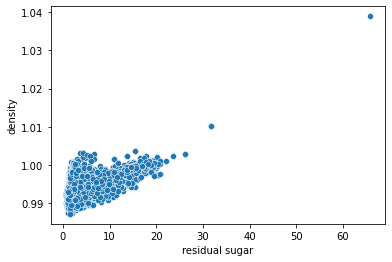

In [7]:
# 다중공선성 확인(scatterplot)
x_data = train['residual sugar']
y_data = train['density']

sns.scatterplot(x= x_data, y= y_data)

### VIF(Variance InfϳͿįjlation Factors)

> VIFκ = 1/(1-Rj²) 
<br>
VIFκ: k번째 변수의 VIF값, Rj²:회귀분석에서 사용하는 결정계수 

`VIF(분산팽창요인)` : 변수간의 다중공선성을 진단하는 수치(범위:1 ~ ∞)<br>
VIF값이 10이상 > 해당 변수는 다중공선성이 있는 것 판단

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
# train data에서 범주형 변수 제거
train.drop('type',inplace = True,axis=1)

In [10]:
#VIF 실습
vif = []
train_val = train.values

for i in range(len(train.columns)):
  vif.append(variance_inflation_factor(train_val, i))

vif

[4.007175138928272,
 64.10743200252591,
 59.14918709853955,
 9.610687118796196,
 9.273443884294641,
 3.616414435307183,
 5.7159808829777585,
 8.420882621285777,
 14.833789006276412,
 945.3239910887048,
 583.5011867251005,
 18.535849630077276,
 131.12669981396292]

In [12]:
# (vif)list to dataframe
vif_dataframe = pd.DataFrame()
vif_dataframe['columns'] = train.columns
vif_dataframe['VIF'] = vif
vif_dataframe

,columns,VIF
0,index,4.007175
1,quality,64.107432
2,fixed acidity,59.149187
3,volatile acidity,9.610687
4,citric acid,9.273444
5,residual sugar,3.616414
6,chlorides,5.715981
7,free sulfur dioxide,8.420883
8,total sulfur dioxide,14.833789
9,density,945.323991


# Preprocessing

## 다중공선성 해결

- 변수 정규화
- 변수 제거
- PCA(주성분 분석)

### 다중공선성 해결 - 변수 정규화

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
# 위에서 train data의 범주형 변수 제거했음
# 기존 train data의 VIF 확인
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
vif["features"] = train.columns 
vif

,VIF Factor,features
0,4.007175,index
1,64.107432,quality
2,59.149187,fixed acidity
3,9.610687,volatile acidity
4,9.273444,citric acid
5,3.616414,residual sugar
6,5.715981,chlorides
7,8.420883,free sulfur dioxide
8,14.833789,total sulfur dioxide
9,945.323991,density


In [16]:
# MinMax Scaler - 데이터 변환
scaler = MinMaxScaler()
scaler.fit(train)

train_scale = scaler.transform(train)

In [17]:
# 변환 후 VIF 확인
new_train_df =  pd.DataFrame(train_scale)
new_train_df.columns = train.columns

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(new_train_df.values, i) for i in range(new_train_df.shape[1])]
vif["features"] = new_train_df.columns 
vif

,VIF Factor,features
0,3.848628,index
1,14.491571,quality
2,37.792930,fixed acidity
3,6.978592,volatile acidity
4,9.094026,citric acid
5,14.246815,residual sugar
6,4.590877,chlorides
7,8.009056,free sulfur dioxide
8,11.227393,total sulfur dioxide
9,106.041429,density


### 다중공선성 해결 - 변수 제거

특정 변수의 VIF값이 10이상 > 제거하기

In [18]:
# 기존 train 변수들의 VIF 확인
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
vif["features"] = train.columns 
vif

,VIF Factor,features
0,4.007175,index
1,64.107432,quality
2,59.149187,fixed acidity
3,9.610687,volatile acidity
4,9.273444,citric acid
5,3.616414,residual sugar
6,5.715981,chlorides
7,8.420883,free sulfur dioxide
8,14.833789,total sulfur dioxide
9,945.323991,density


In [19]:
# VIF가 10이상인 변수 제거, 종속변수(quality) 제외
new_train = train.drop(['alcohol','fixed acidity','total sulfur dioxide','density','pH','sulphates'],axis=1)

In [21]:
new_train.head()

,index,quality,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide
0,0,5,0.695,0.06,6.8,0.042,9.0
1,1,5,0.610,0.14,2.4,0.067,10.0
2,2,5,0.210,0.39,2.0,0.057,21.0
3,3,6,0.210,0.31,6.0,0.046,29.0
4,4,6,0.400,0.26,9.5,0.059,32.0


In [22]:
# new train(제거 결과) 변수들의 VIF 확인
new_train_df =  pd.DataFrame(new_train)
new_train_df.columns = new_train.columns

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(new_train_df.values, i) for i in range(new_train_df.shape[1])]
vif["features"] = new_train_df.columns 
vif

,VIF Factor,features
0,3.833384,index
1,14.972137,quality
2,6.241906,volatile acidity
3,6.411839,citric acid
4,2.751270,residual sugar
5,4.407827,chlorides
6,4.853373,free sulfur dioxide
